In [169]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from keras import layers
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, roc_curve
from keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

In [185]:
data = pd.read_csv('python_codes/dataset_500_21_recordings_v4.csv')

In [186]:
#checking the amount of data
data.shape

(4777, 83)

In [187]:
#remove duplicates
data.drop_duplicates("birdSound", keep="first", inplace=True)

In [188]:
#checking data after removing duplicates
data.shape

(4777, 83)

In [174]:
poly = PolynomialFeatures(include_bias=False, interaction_only=True)

In [175]:
data = data.drop(['birdSound'],axis=1)

In [176]:
data.iloc[:, :-1].head()

,sound_median,sound_mean,sound_std,chroma_stft_median,chroma_stft_mean,chroma_stft_std,rms_median,rms_mean,rms_std,spectral_centroid_median,...,mfcc_std17,mfcc_median18,mfcc_mean18,mfcc_std18,mfcc_median19,mfcc_mean19,mfcc_std19,mfcc_median20,mfcc_mean20,mfcc_std20
0,-6.351335e-05,-6.333958e-05,0.013106,0.041940,0.229366,0.329840,0.000212,0.001253,0.004196,9941.271476,...,8.778395,1.752184,1.872641,7.376098,-1.275718,-0.984656,7.442373,2.662979,3.635231,6.939034
1,6.866045e-05,4.663520e-05,0.009118,0.250548,0.358658,0.334298,0.000027,0.000250,0.000678,5089.809140,...,7.443198,0.119155,-1.109779,8.158848,0.892763,1.472027,7.035617,1.076863,1.252048,7.544783
2,3.176906e-07,-8.101284e-09,0.035807,0.071402,0.224597,0.312671,0.001018,0.010865,0.018757,4382.897663,...,8.288863,1.666752,3.532516,7.958379,0.056443,0.719548,7.991818,-1.921792,-3.831388,8.580925
3,0.000000e+00,7.826290e-08,0.023321,0.175518,0.301874,0.319029,0.000099,0.006572,0.020510,7606.338664,...,7.047872,0.406961,2.970625,5.852077,0.206729,0.706336,5.403243,-0.238021,-1.922228,6.015114
4,0.000000e+00,-4.171003e-05,0.083057,0.222774,0.332619,0.317830,0.000240,0.005629,0.024900,7116.898527,...,5.616858,0.000000,0.971736,6.115594,0.000000,0.180466,5.033263,0.000000,-1.197898,5.648283


In [177]:
data_poly = poly.fit_transform(data.iloc[:, :-1])

In [178]:
data_poly = pd.DataFrame(data_poly, columns=poly.get_feature_names(data.iloc[:, :-1].columns))

In [179]:
# list(data_poly.columns)

In [180]:
data_poly.shape

(4756, 3321)

In [181]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)#Scaling the Feature columns
scaler = StandardScaler()
X = np.array(data_poly, dtype = float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
X_train_sc = scaler.fit_transform(X_train)#Dividing data into training and Testing set
X_test_sc = scaler.transform(X_test)

In [182]:
pd.Series(y).value_counts()

2    500
5    498
0    498
8    495
4    492
3    488
1    482
7    475
6    466
9    362
dtype: int64

In [183]:
X_train_sc.shape

(3804, 3321)

In [184]:
X_test_sc.shape

(952, 3321)

In [159]:
es = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0
)

model = Sequential()
model.add(layers.Dense(3321, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [160]:
classifier = model.fit(X_train_sc,
                    y_train,
                    epochs=100,
                    batch_size=500,
                    validation_data=(X_test_sc,y_test),
#                     callbacks=[es],
                    verbose=1)

Train on 3789 samples, validate on 948 samples
Epoch 1/100
3789/3789 [==============================] - 2s 456us/step - loss: 2.5774 - accuracy: 0.2338 - val_loss: 1.5517 - val_accuracy: 0.5643
Epoch 2/100
3789/3789 [==============================] - 2s 467us/step - loss: 2.2109 - accuracy: 0.3064 - val_loss: 1.5734 - val_accuracy: 0.6097
Epoch 3/100
3789/3789 [==============================] - 2s 436us/step - loss: 1.9331 - accuracy: 0.3576 - val_loss: 1.4978 - val_accuracy: 0.6382
Epoch 4/100
3789/3789 [==============================] - 2s 477us/step - loss: 1.8411 - accuracy: 0.3932 - val_loss: 1.2923 - val_accuracy: 0.6456
Epoch 5/100
3789/3789 [==============================] - 2s 478us/step - loss: 1.7464 - accuracy: 0.4339 - val_loss: 1.2491 - val_accuracy: 0.6709
Epoch 6/100
3789/3789 [==============================] - 2s 534us/step - loss: 1.6472 - accuracy: 0.4571 - val_loss: 1.2073 - val_accuracy: 0.6899
Epoch 7/100
3789/3789 [==============================] - 2s 542us/step 

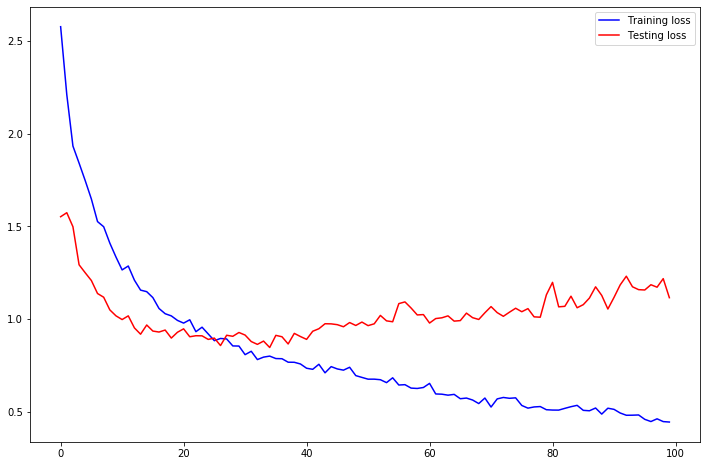

In [161]:
train_loss = classifier.history['loss']
test_loss = classifier.history['val_loss']
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='blue')
plt.plot(test_loss, label='Testing loss', color='red')
plt.legend();

In [162]:
j = y_test == model.predict_classes(X_test_sc)

In [163]:
correct = 0
incorrect = 0 
for i in j:
    if i :
        correct += 1
    else:
        incorrect += 1

In [164]:
correct

753

In [165]:
incorrect

195

In [166]:
(correct / (correct+incorrect))*100

79.43037974683544

In [167]:
target_names = encoder.inverse_transform(pd.Series(y_test).sort_values().unique())

In [168]:
print(classification_report(y_test, model.predict_classes(X_test_sc), target_names=target_names))

                          precision    recall  f1-score   support

       Black-headed_gull       0.83      0.79      0.81       100
Brown-crested_flycatcher       0.93      0.89      0.91        96
            Common_raven       0.94      0.77      0.85       100
  Eurasian_collared-dove       0.86      0.85      0.86        98
        Eurasian_skylark       0.80      0.78      0.79        98
           House_sparrow       0.76      0.71      0.73       100
                 Mallard       0.84      0.81      0.82        93
      Olive-backed_pipit       0.85      0.87      0.86        95
           Red_crossbill       0.85      0.70      0.77        99
          Warbling_vireo       0.43      0.80      0.56        69

                accuracy                           0.79       948
               macro avg       0.81      0.80      0.80       948
            weighted avg       0.82      0.79      0.80       948

